In [2]:

# prediction of the final closing price of Apple shares during 2022-2023

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# code for downloading data from Yahoo Finance
ticker_symbol = "AAPL"  # example for Apple shares - You can also use the data of any other company
# - you just need to change the name ("AAPL" to any other)


# time frame for data
start_date = "2022-01-01"
end_date = "2023-01-12"

# loading data into a variable "stock_data"
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# 5 datarows output
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953873   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669968   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943970   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [3]:

# display data about trades, where

# Date: The date for which stock prices are provided.
#Open: The opening price of the stock at the beginning of the trading session.
# High: The highest stock price during the trading session.
# Low: Lowest stock price during the trading session.
#Close: The closing price of the stock at the end of the trading session.
# Adj Close: Adjusted closing price to take into account corporate events such as dividends and other corporate actions.
# Volume: Volume of shares traded during the specified period.


# in such cases it is worth predicting either
# closing price (Close): Many stock price prediction models are built
# on forecasting the closing price.

# or

# open price (Open): the model can also predict the opening price.

# or 

# other options depending on what exactly we need
# in this case we will predict exactly Adj Close - Adjusted closing price,
# taking into account corporate events such as dividends and other corporate actions.


stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100
...,...,...,...,...,...,...
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325089,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800


In [4]:
# feature initalization
features = ['Open', 'High', 'Low', 'Close', 'Volume']
# label initalization
label = ['Adj Close']

In [5]:
stock_data[features].values

# The code stock_data[features].values ​​will return a NumPy array,
# containing the values ​​of the selected features (Open, High, Low, Close, Volume) from the DataFrame stock_data.

# Specifically, each row of the array will represent one day of trading,
# and each column will represent one of the features.
# So the shape of the array will be (number of days, number of features).

# Simply put - Each line represents a day of trading,
# and each column corresponds to one of the attributes (Open, High, Low, Close, Volume).

# So if you see a value in the i-th row and j-th column,
# this means the value of attribute j for day i.
# For example, the value in the 3rd row and 4th column will represent the closing price (Close)
# for the third day of trading.


array([[1.77830002e+02, 1.82880005e+02, 1.77710007e+02, 1.82009995e+02,
        1.04487900e+08],
       [1.82630005e+02, 1.82940002e+02, 1.79119995e+02, 1.79699997e+02,
        9.93104000e+07],
       [1.79610001e+02, 1.80169998e+02, 1.74639999e+02, 1.74919998e+02,
        9.45376000e+07],
       ...,
       [1.30470001e+02, 1.33410004e+02, 1.29889999e+02, 1.30149994e+02,
        7.07908000e+07],
       [1.30259995e+02, 1.31259995e+02, 1.28119995e+02, 1.30729996e+02,
        6.38962000e+07],
       [1.31250000e+02, 1.33509995e+02, 1.30460007e+02, 1.33490005e+02,
        6.94589000e+07]])

In [6]:
# numeric values ​​for the Adj Close column, which are in the label variable
stock_data[label].values

array([[179.95387268],
       [177.66996765],
       [172.94396973],
       [170.05697632],
       [170.22503662],
       [170.24481201],
       [173.10217285],
       [173.54711914],
       [170.24481201],
       [171.11491394],
       [167.88182068],
       [164.35215759],
       [162.65158081],
       [160.57530212],
       [159.79425049],
       [157.97503662],
       [157.8860321 ],
       [157.4213562 ],
       [168.40585327],
       [172.80557251],
       [172.63751221],
       [173.85359192],
       [170.94680786],
       [170.659729  ],
       [169.93704224],
       [173.07524109],
       [174.51066589],
       [170.39242554],
       [166.94734192],
       [167.18496704],
       [171.05569458],
       [170.81811523],
       [167.18496704],
       [165.62081909],
       [162.67074585],
       [158.46339417],
       [161.1065979 ],
       [163.19540405],
       [163.46269226],
       [161.5619812 ],
       [164.88822937],
       [164.5615387 ],
       [161.53227234],
       [157

In [7]:
# splitting data into two samples
train_data, test_data = train_test_split(stock_data, test_size=0.2)

In [8]:
# place arrays of features
x_train = train_data.drop('Adj Close', axis=1)
# and labels
y_train = train_data['Adj Close']
# into the appropriate variables for the training data

In [9]:
# same for test data
x_test = test_data.drop('Adj Close', axis=1)
y_test = test_data['Adj Close']

In [10]:
# using RandomForestRegressor as main ML method
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
# set up some hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['mse', 'friedman_mse', 'poisson']
    }

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid, 
                           verbose=10)

In [12]:
# search of the best hyperparameters
grid_search.fit(x_test, y_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 1/5; 1/144] END criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/144] START criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 1/144] END criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/144] START criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 1/144] END criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/144] START criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 1/144] END criterion=mse, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'poisson'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [13]:
# assigning the best of the selected hyperparameters to the model
model = grid_search.best_estimator_

In [14]:
# accuracy check
model.score(x_test, y_test)

0.9970696313448055

In [15]:
# prediction output

# prediction initialization
predictions = model.predict(x_test)

# Convert index to "Date" column for test data
test_data.reset_index(inplace=True)

# Adding a prediction column to test data
test_data['Predictions'] = predictions

# Sort test data by date
sorted_test_data = test_data.sort_values(by='Date')

# Print predictions and actuals ordered by date
print(sorted_test_data[['Date', 'Predictions', 'Adj Close']])


         Date  Predictions   Adj Close
31 2022-01-07   170.258999  170.225037
6  2022-01-31   171.218192  172.805573
29 2022-03-03   164.380518  164.561539
38 2022-03-04   161.795702  161.532272
12 2022-03-07   158.933893  157.701096
27 2022-03-09   161.181315  161.314468
42 2022-03-14   149.177784  149.108200
13 2022-03-17   159.140053  159.007843
14 2022-03-22   165.969411  167.125534
44 2022-04-14   164.449167  163.630981
43 2022-04-25   160.831948  161.245163
5  2022-05-03   158.059675  157.879303
26 2022-05-12   140.825063  141.336487
20 2022-05-17   147.785016  147.959167
8  2022-05-20   136.247137  136.409134
24 2022-06-01   147.544893  147.433716
11 2022-06-02   149.658230  149.912247
21 2022-06-08   147.024028  146.690140
25 2022-06-09   142.246248  141.415817
10 2022-06-10   136.376966  135.953110
37 2022-06-13   131.445791  130.748154
33 2022-06-16   129.898310  128.943756
49 2022-06-24   140.337294  140.444214
50 2022-06-27   140.826534  140.444214
30 2022-06-30   135.67300

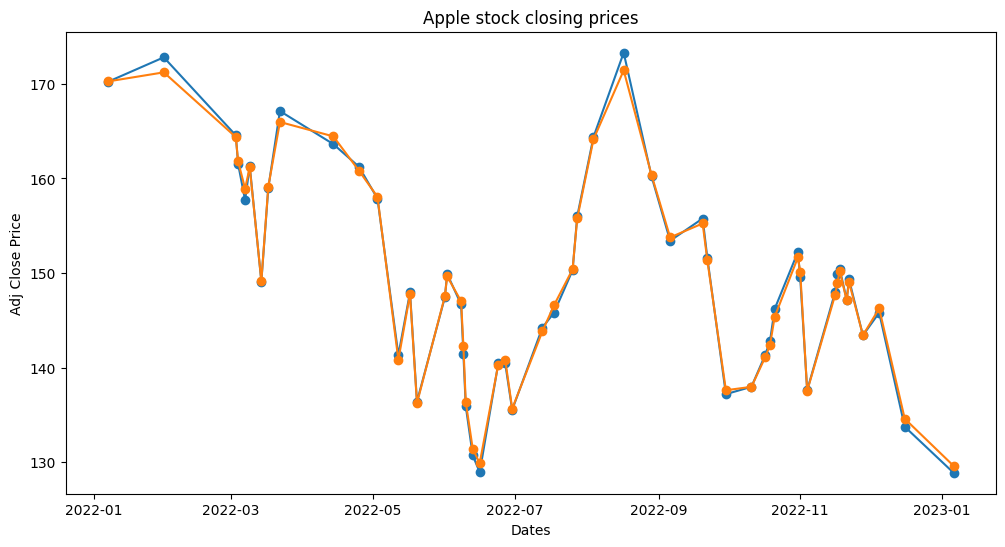

In [17]:
# plotting

import matplotlib.pyplot as plt

# plot size initialization
plt.figure(figsize=(12, 6))

# actual data plotting
plt.plot(sorted_test_data['Date'], sorted_test_data['Adj Close'], label='Actual data', marker='o')

# predictions plotting
plt.plot(sorted_test_data['Date'], sorted_test_data['Predictions'], label='Prediction', marker='o')

# Add axis labels
plt.xlabel('Dates')
plt.ylabel('Adj Close Price')
plt.title('Apple stock closing prices')


# plotting
plt.show()
